# Countries of the World EDA

### Abstract

The aim of this analysis is to find the factors affecting a country's GDP on a data from the world factbook provide to us. 
For this we are using linear regression technique to understand the dependent variables on the GDP and how do they affect each other.
The process of analyzing the data is to :
1. Load the Data
2. Understand the Data
3. Perform visual analysis on the data 
4. Draw conclusions


### Acknowledgements

Source: All these data sets are made up of data from the US government. Data from the World Factbook is public domain. The website says "The World Factbook is in the public domain and may be used freely by anyone at anytime without seeking permission." 
[https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html](https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html)

### Importing the libraries. 
#### We are using multiple libraries in the process of analyzing the data.

In [6]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Dataset

### Step 1. Importing Dataset

Pandas accepts dataset can be imported in multiple formats i.e. JSON, CSV, HDF5, Stata, Python Pickle etc.
In this case we are going to import a file in the .csv format

In [7]:
# Data is read in the .csv format and the decimal seperator is used
 
df=pd.read_csv("countries_of_the_world.csv", decimal = ',') 

### 2. Studying the Dataset

#### Overall View

In [8]:
# To get an overall view of the data, we retrieve the first 5 rows from the data set

df.head() 

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


#### Summary Statistics

In [9]:
#The describe functions gives the summary statistics(mean, median, standard deviation etc.) of the numerical columns.

#Thus this does not include data of the 'country' and 'region' column 

df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


### Step 3: Data Anomalies

##### It is important to handle these anomalies as they could lead to incorrect prediction or classification for any given model being used. Often there are hidden patterns in missing data points. Those patterns can provide additional insight in the problem

#### Step 1: Checking for Null Values

In [10]:
value = df.isnull().values.any()
print(value)
#print('Are there any null values in the data?: ' +value)

True


In [11]:
# getting information about the dataset for analysing the null values

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null float64
Birthrate       

##### Looking at the above information we can realize that the columns 'Net migration', 'Infant mortality (per 1000 births)', 'GDP ( $ per capita)','Literacy (%)', 'Phones (per 1000)', 'Arable(%)', 'Crops(%)','Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry' and 'Service' all have missing values

#### Counting the missing values in each column: 

In [12]:
df.isnull().sum() 

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

#### Counting the sum of all the missing values

In [13]:
df.isnull().sum().sum()

110

#### Calculating the missing percentage of the null values

In [14]:
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
Climate,22,9.69
Literacy (%),18,7.93
Industry,16,7.05
Service,15,6.61
Agriculture,15,6.61
Deathrate,4,1.76
Phones (per 1000),4,1.76
Birthrate,3,1.32
Infant mortality (per 1000 births),3,1.32
Net migration,3,1.32


### Step 4. Data Visualization 

#### The aim is to find the independent variable and the understand how the dependent variables affect the independent variale. 
This is a multiple linear regression problem as there are many dependent variables like popuation, Literacy % etc but there is just one independent variable: GDP

### Step 1: Sort countries by GDP per capita

In [15]:
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False)
# Look at top 20
top_gdp_countries[['GDP ($ per capita)','Country', 'Population']].head(20)

,GDP ($ per capita),Country,Population
121,55100.0,Luxembourg,474413
154,37800.0,Norway,4610820
214,37800.0,United States,298444215
22,36000.0,Bermuda,65773
38,35000.0,Cayman Islands,45436
177,34600.0,San Marino,29251
196,32700.0,Switzerland,7523934
54,31100.0,Denmark,5450661
93,30900.0,Iceland,299388
12,30000.0,Austria,8192880


In [16]:
#GDP = df.sort_values('GDP ($ per capita)',ascending=False)
#sns.scatterplot

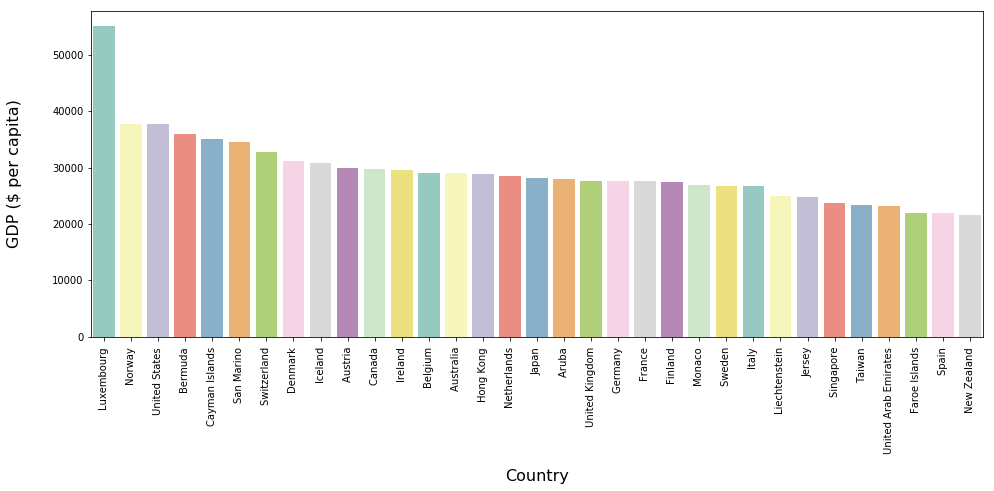

In [18]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.head(33), palette='Set3')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

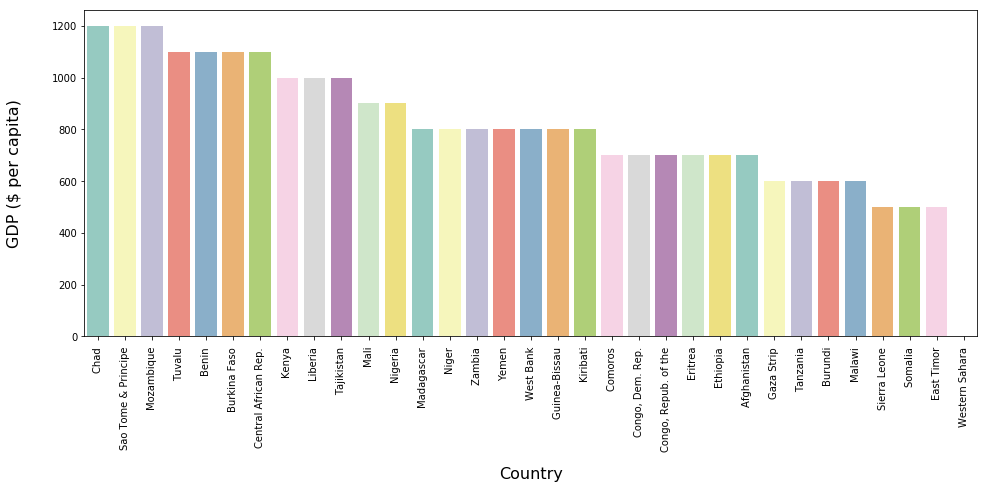

In [19]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.tail(33), palette='Set3')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

##### We realised in the previous step that GDP was missing fpor one country. By looking at the above bar graph plottiong the tail(last 33 countries), we can find out the missing country being: Western Sahara

### Step 2: Group by Regions and  Analyze     

##### Trying to analyze the data region-wise to get more detailed information 

In [20]:
df.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


In [21]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


#### Literacy % By Region

C:\Users\mantr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


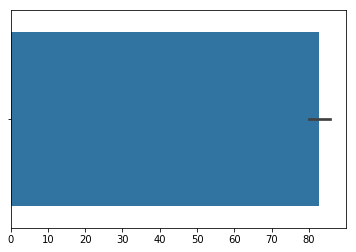

In [22]:
sns.barplot(np.array(df['Literacy (%)']))

#### Total GDP per Capita By Regions 

<Figure size 5040x5040 with 0 Axes>

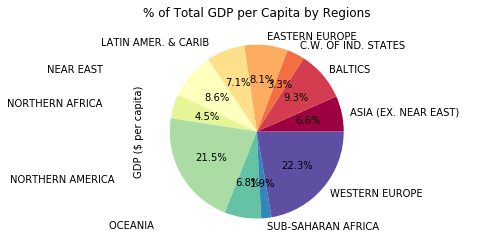

In [23]:
#sns.boxplot(x= df['GDP ($ per capita)'], y = df['Region'], palette = 'twilight')
#plt.rcParams['figure.figsize'] = (15, 9)
x = df.groupby("Region", as_index=False)["GDP ($ per capita)"].mean()
x.set_index("Region",drop=True,inplace=True)
plt.figure(figsize=(70,70))
x.plot(kind = "pie",colormap = "Spectral", subplots = True, autopct='%1.1f%%', legend=False)
plt.title("% of Total GDP per Capita by Regions")
plt.rcParams['figure.figsize'] = (15, 9)

##### From the above figure we can analyze that Western Europe has the higest GDP ($ per capita) closely followed by Northen America. And Sub Saharan Africa has the lowest GDP

### Correlation Analysis
##### Finding the Correlation between the dependent and the independent variables

In [24]:
df.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,0.000011,0.023003,-0.039324,-0.043481,-0.030819,0.188251,-0.060757,-0.120606,-0.026546,-0.045090,-0.028367,0.000376,0.099333,-0.080852
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.047470,-0.007163,0.072185,0.035994,0.053403,-0.079714,-0.143916,0.138974,-0.117134,-0.066423,0.040079,-0.050640,0.121565,-0.054369
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.178038,-0.144238,0.195773,0.097230,0.280172,-0.081015,-0.031661,0.081859,0.009064,-0.159192,-0.070045,-0.107142,-0.139803,0.248774
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.134145,-0.136577,0.049118,0.117095,0.152129,-0.120772,0.341820,-0.079494,-0.032579,-0.075765,-0.161866,-0.030250,-0.199995,0.196528
Net migration,0.000011,0.047470,0.178038,-0.134145,1.000000,-0.025015,0.382461,-0.008761,0.239601,-0.058170,-0.347968,0.225299,-0.015170,-0.066537,0.033611,-0.116719,-0.026324,0.127134
Infant mortality (per 1000 births),0.023003,-0.007163,-0.144238,-0.136577,-0.025015,1.000000,-0.600774,-0.765536,-0.672312,-0.113859,-0.062366,0.124100,-0.374406,0.845764,0.656338,0.709475,0.003322,-0.633982
GDP ($ per capita),-0.039324,0.072185,0.195773,0.049118,0.382461,-0.600774,1.000000,0.513144,0.834499,0.019768,-0.219229,0.097828,0.340791,-0.650137,-0.201661,-0.586769,-0.028926,0.550216
Literacy (%),-0.043481,0.035994,0.097230,0.117095,-0.008761,-0.765536,0.513144,1.000000,0.601935,0.105021,0.042825,-0.107563,0.392081,-0.790846,-0.393946,-0.609638,0.064733,0.494607
Phones (per 1000),-0.030819,0.053403,0.280172,0.152129,0.239601,-0.672312,0.834499,0.601935,1.000000,0.061022,-0.152420,0.029900,0.402161,-0.724614,-0.260309,-0.601739,-0.152452,0.683934
Arable (%),0.188251,-0.079714,-0.081015,-0.120772,-0.058170,-0.113859,0.019768,0.105021,0.061022,1.000000,0.094361,-0.856763,0.380031,-0.186823,0.053472,-0.034822,-0.063618,0.091126


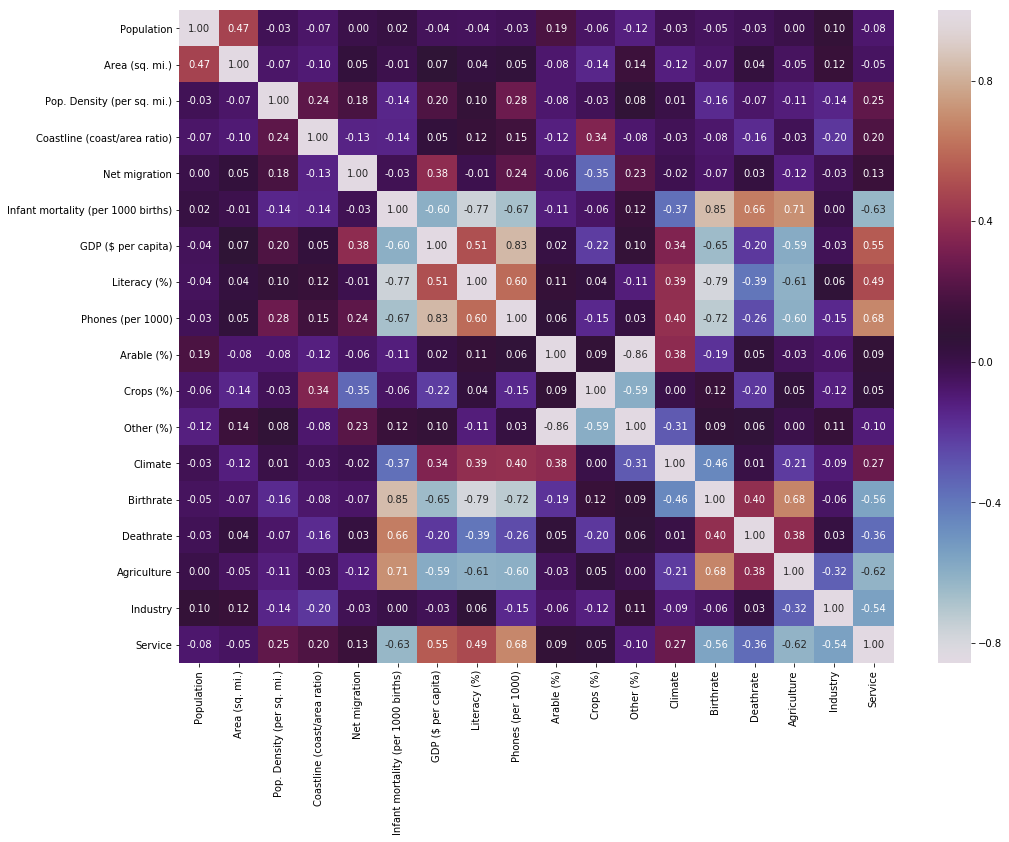

In [25]:
# Plotting the correlation

plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='twilight')
plt.show()

### Highest Correlation variables

#### 'literacy', 'phones_per_1000', 'infant_mortality_per_1000_births','birthrate','deathrate' have higest absolute value correlation with 'gdp_$_per_capita'

In [26]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Service','Infant mortality (per 1000 births)','Birthrate','Deathrate']]

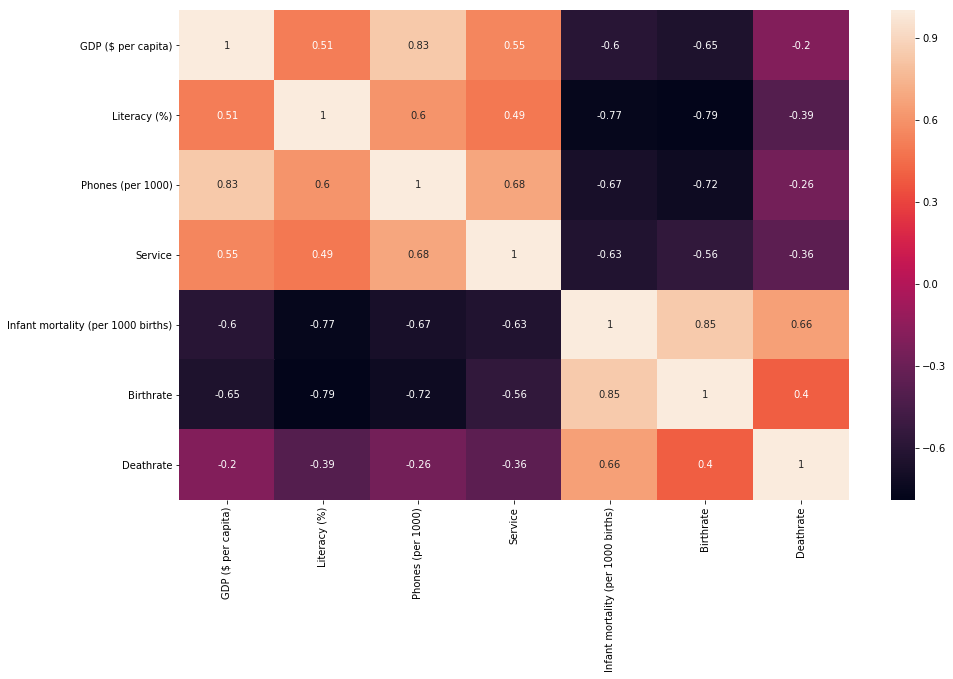

In [27]:
# show corr of the same
sns.heatmap(x.corr(), annot=True)

#### Plotting the correlation between the factors that prominently affect the GDP

As we can see from the above correlation diagram, the factors(dependent variables) that are closely affecting the GDP(Independent variable) are literacy, phones, service, Infannt mortality, Birthrate, Deathrate. Hence we go ahead and study them at a more detailed level

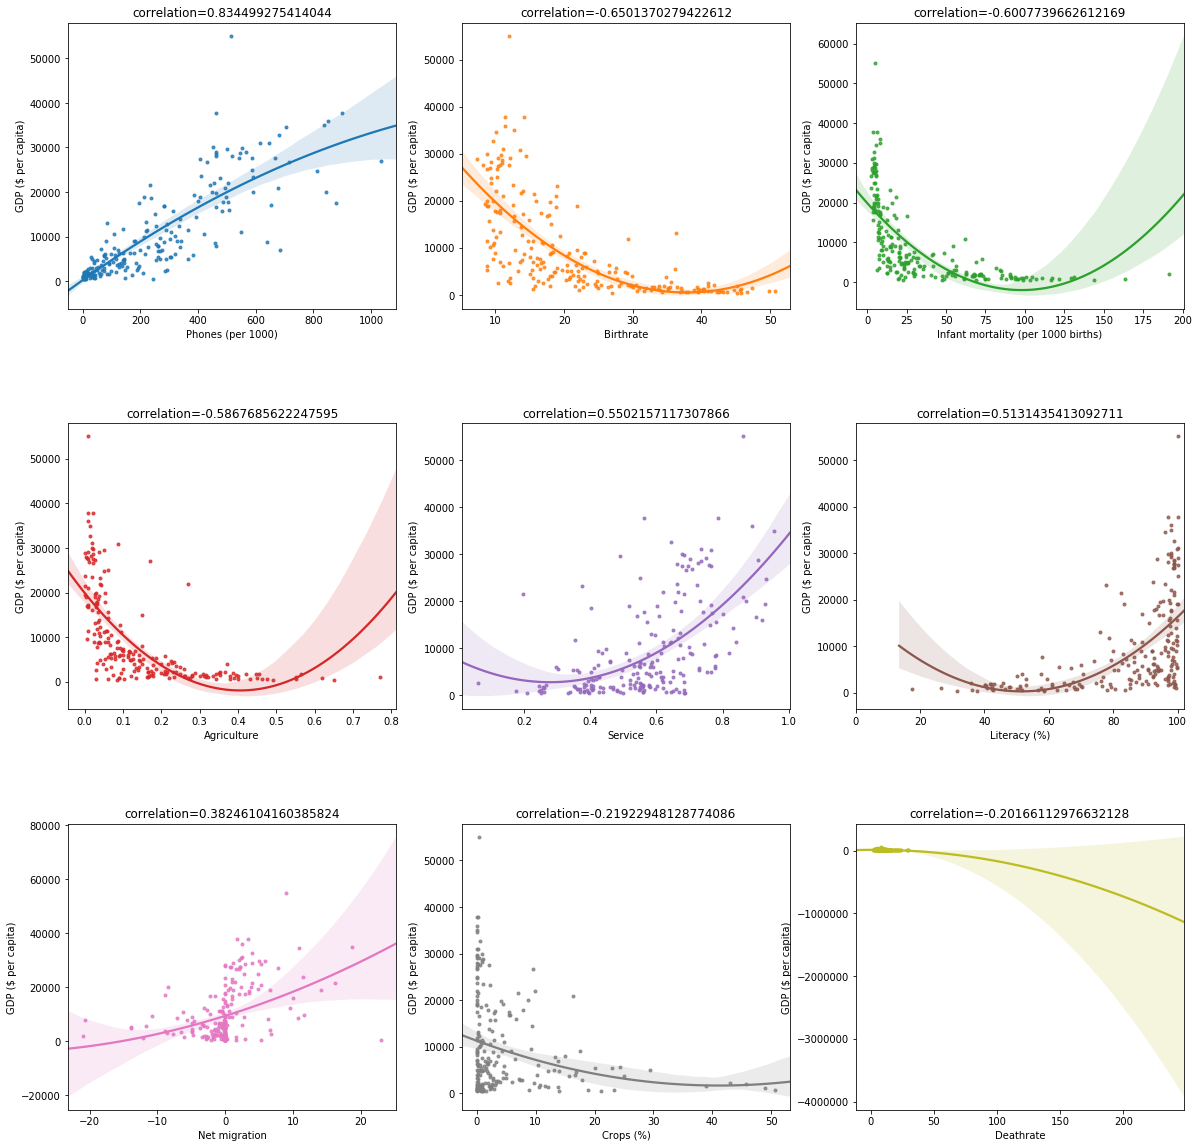

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = df['GDP ($ per capita)'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=df,
                   ax=axes[i,j], fit_reg=True, marker='.',order = 2)
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

##### Looking at the above plots, we can understand that 
a. Phone and service have an almost linear relation with the GDP,  
b. Birthrate, Infant Mortality and Agriculture are inversely proportional to the GDP 

#### Focusing on Phones and Service

In [25]:
# grouping by the region, we try to analyze the effect of the GDP, Phone and Service 
df.groupby('Region')[['GDP ($ per capita)', 'Phones (per 1000)', 'Service']].median()

,GDP ($ per capita),Phones (per 1000),Service
Region,,,
ASIA (EX. NEAR EAST),3450.0,61.50,0.4950
BALTICS,11400.0,321.40,0.6660
C.W. OF IND. STATES,3450.0,155.35,0.4595
EASTERN EUROPE,9100.0,296.05,0.5910
LATIN AMER. & CARIB,6300.0,222.85,0.6180
NEAR EAST,9250.0,211.00,0.5840
NORTHERN AFRICA,6000.0,123.60,0.4255
NORTHERN AMERICA,29800.0,683.20,0.7870
OCEANIA,5000.0,118.60,0.6440


C:\Users\mantr\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mantr\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


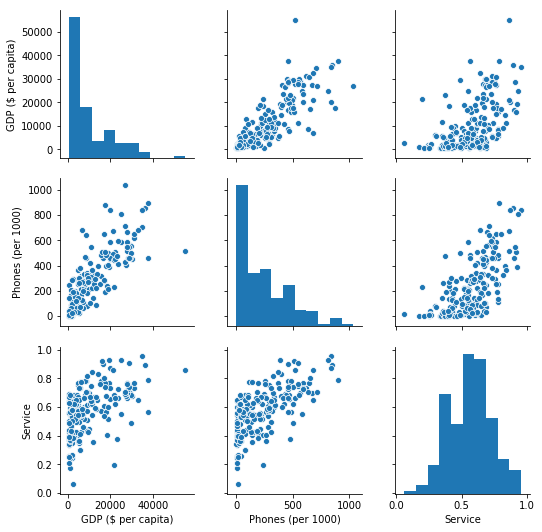

In [29]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Phones (per 1000)','Service']]

sns.pairplot(x)

In [30]:
x.corr()

,GDP ($ per capita),Phones (per 1000),Service
GDP ($ per capita),1.000000,0.834499,0.550216
Phones (per 1000),0.834499,1.000000,0.683934
Service,0.550216,0.683934,1.000000


##### From the above plot:
GDP has a more linear relation with Phones than With service. 

#### Removing Null Values from GDP, Phones and Service

In [31]:
#Filtering the GDP off the null values and cleansing the data
gdp_no_nan= df['GDP ($ per capita)'][~np.isnan(df['GDP ($ per capita)'])]

In [32]:
#Listing out the cleansed data
gdp_no_nan

0        700.0
1       4500.0
2       6000.0
3       8000.0
4      19000.0
5       1900.0
6       8600.0
7      11000.0
8      11200.0
9       3500.0
10     28000.0
11     29000.0
12     30000.0
13      3400.0
14     16700.0
15     16900.0
16      1900.0
17     15700.0
18      6100.0
19     29100.0
20      4900.0
21      1100.0
22     36000.0
23      1300.0
24      2400.0
25      6100.0
26      9000.0
27      7600.0
28     16000.0
29     18600.0
        ...   
196    32700.0
197     3300.0
198    23400.0
199     1000.0
200      600.0
201     7400.0
202     1500.0
203     2200.0
204     9500.0
205     6900.0
206     6700.0
207     5800.0
208     9600.0
209     1100.0
210     1400.0
211     5400.0
212    23200.0
213    27700.0
214    37800.0
215    12800.0
216     1700.0
217     2900.0
218     4800.0
219     2500.0
220    17200.0
221     3700.0
222      800.0
224      800.0
225      800.0
226     1900.0
Name: GDP ($ per capita), Length: 226, dtype: float64

#### Distribution plots:

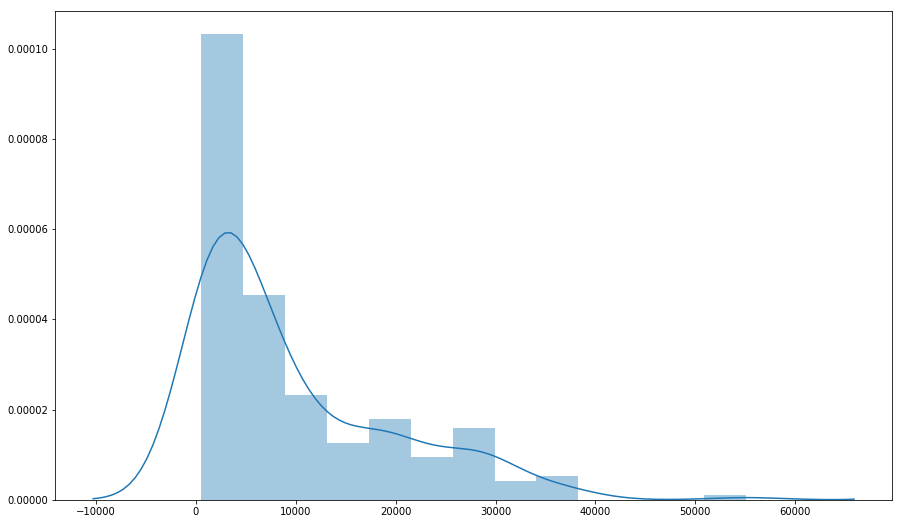

In [33]:
#checking distribution of GDP of the world
sns.distplot(np.array(gdp_no_nan))

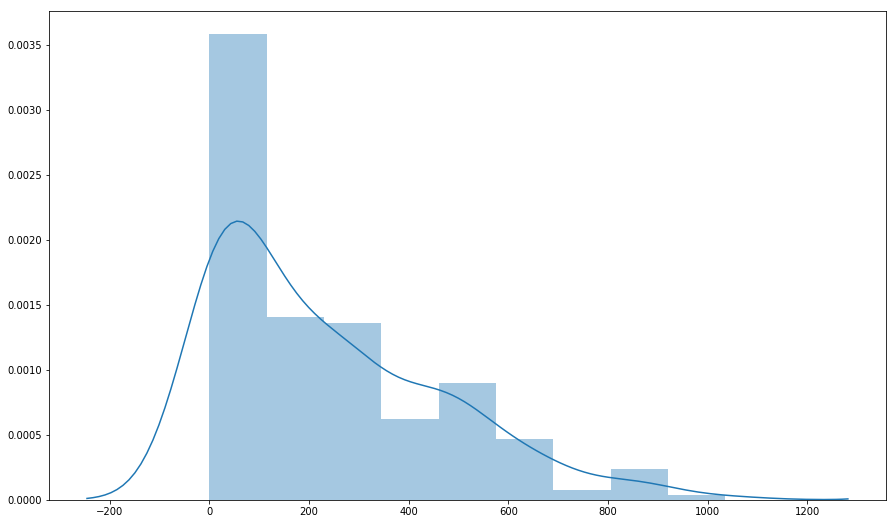

In [34]:
#checking distribution of Phones
sns.distplot(np.array(df['Phones (per 1000)'][~np.isnan(df['Phones (per 1000)'])]))

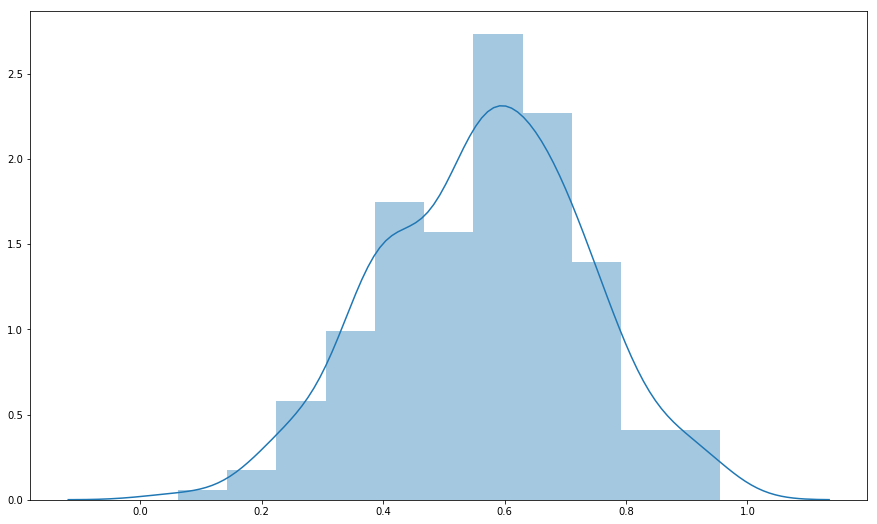

In [35]:
# Checking distribution of service
sns.distplot(np.array(df['Service'][~np.isnan(df['Service'])]))

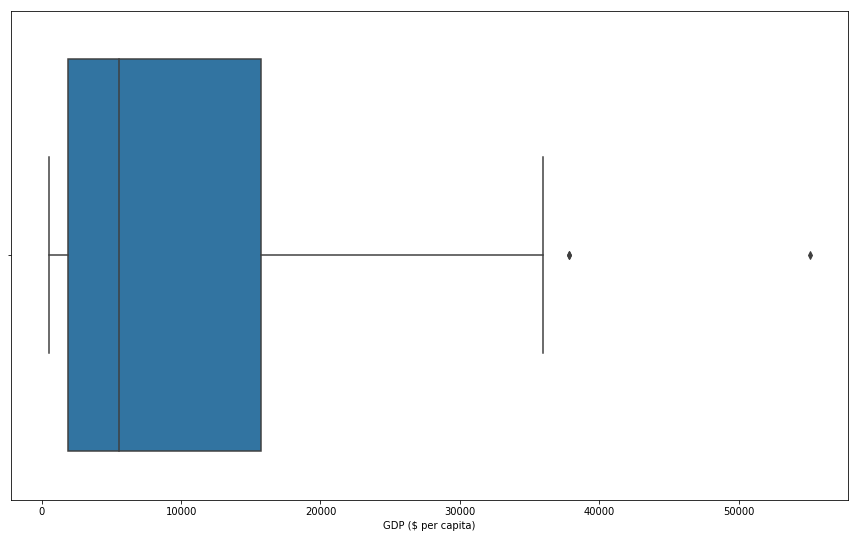

In [36]:
sns.boxplot(( df['GDP ($ per capita)'] ))

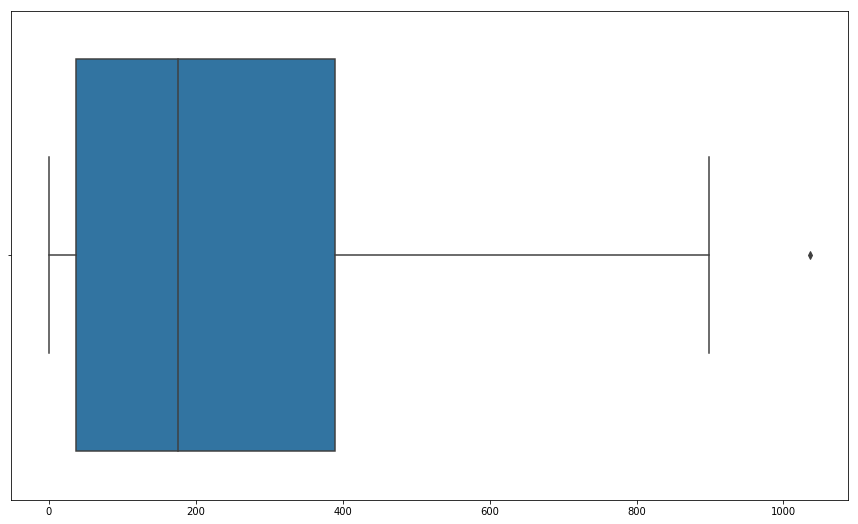

In [34]:
sns.boxplot(np.array( df['Phones (per 1000)']))

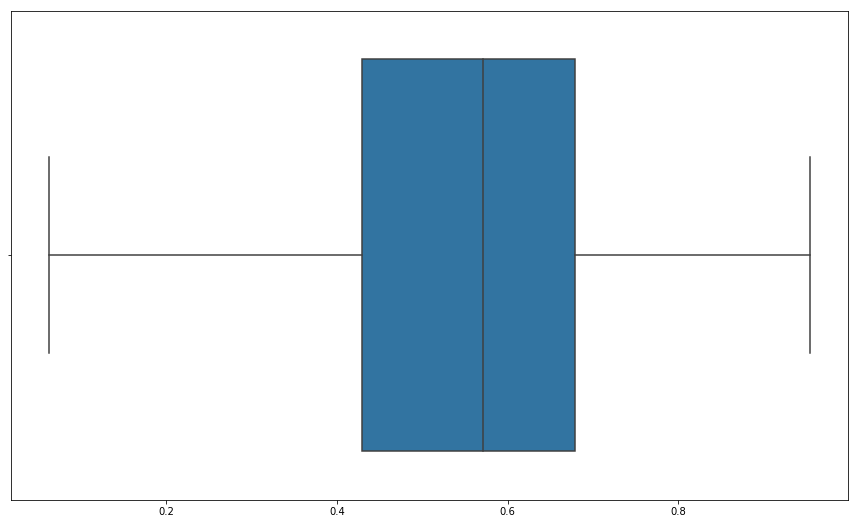

In [37]:
sns.boxplot(np.array(df['Service']))

## Conclusion

According to the analysis performed, we can infer that 

--> This is a multiple linear regression model as we can see there and multiple dependable variables and only one independednt variable ('GDP($ per capita).

--> After  refining the data to remove the null values, we visually analyzed the data and realized that Phone and Service sector has a linear relation with the GDP. But closely looking at it, we realized that Phone is more linearly related to GDP than service.
This means that, when the value of the GDP increases along with the increase in the value of phones 

--> It was also visually observed that the regions with highest GDP are Western Europe closely followed by Northen America. And Sub Saharan Africa has the lowest GDP

--> It is also observed that the Climate is a categorical data


## Contributions 

By Self: 20%

By External Sources: 80%

##  Citations

https://github.com/nikbearbrown/INFO_6105

https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce

https://www.youtube.com/watch?v=cpZExlOKFH4&t=14s

https://www.kaggle.com/mumus77/data-visualization-country-data

##  License

Copyright 2019 Manogna Mantripragada

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.